# Face Recognition using DeepFace

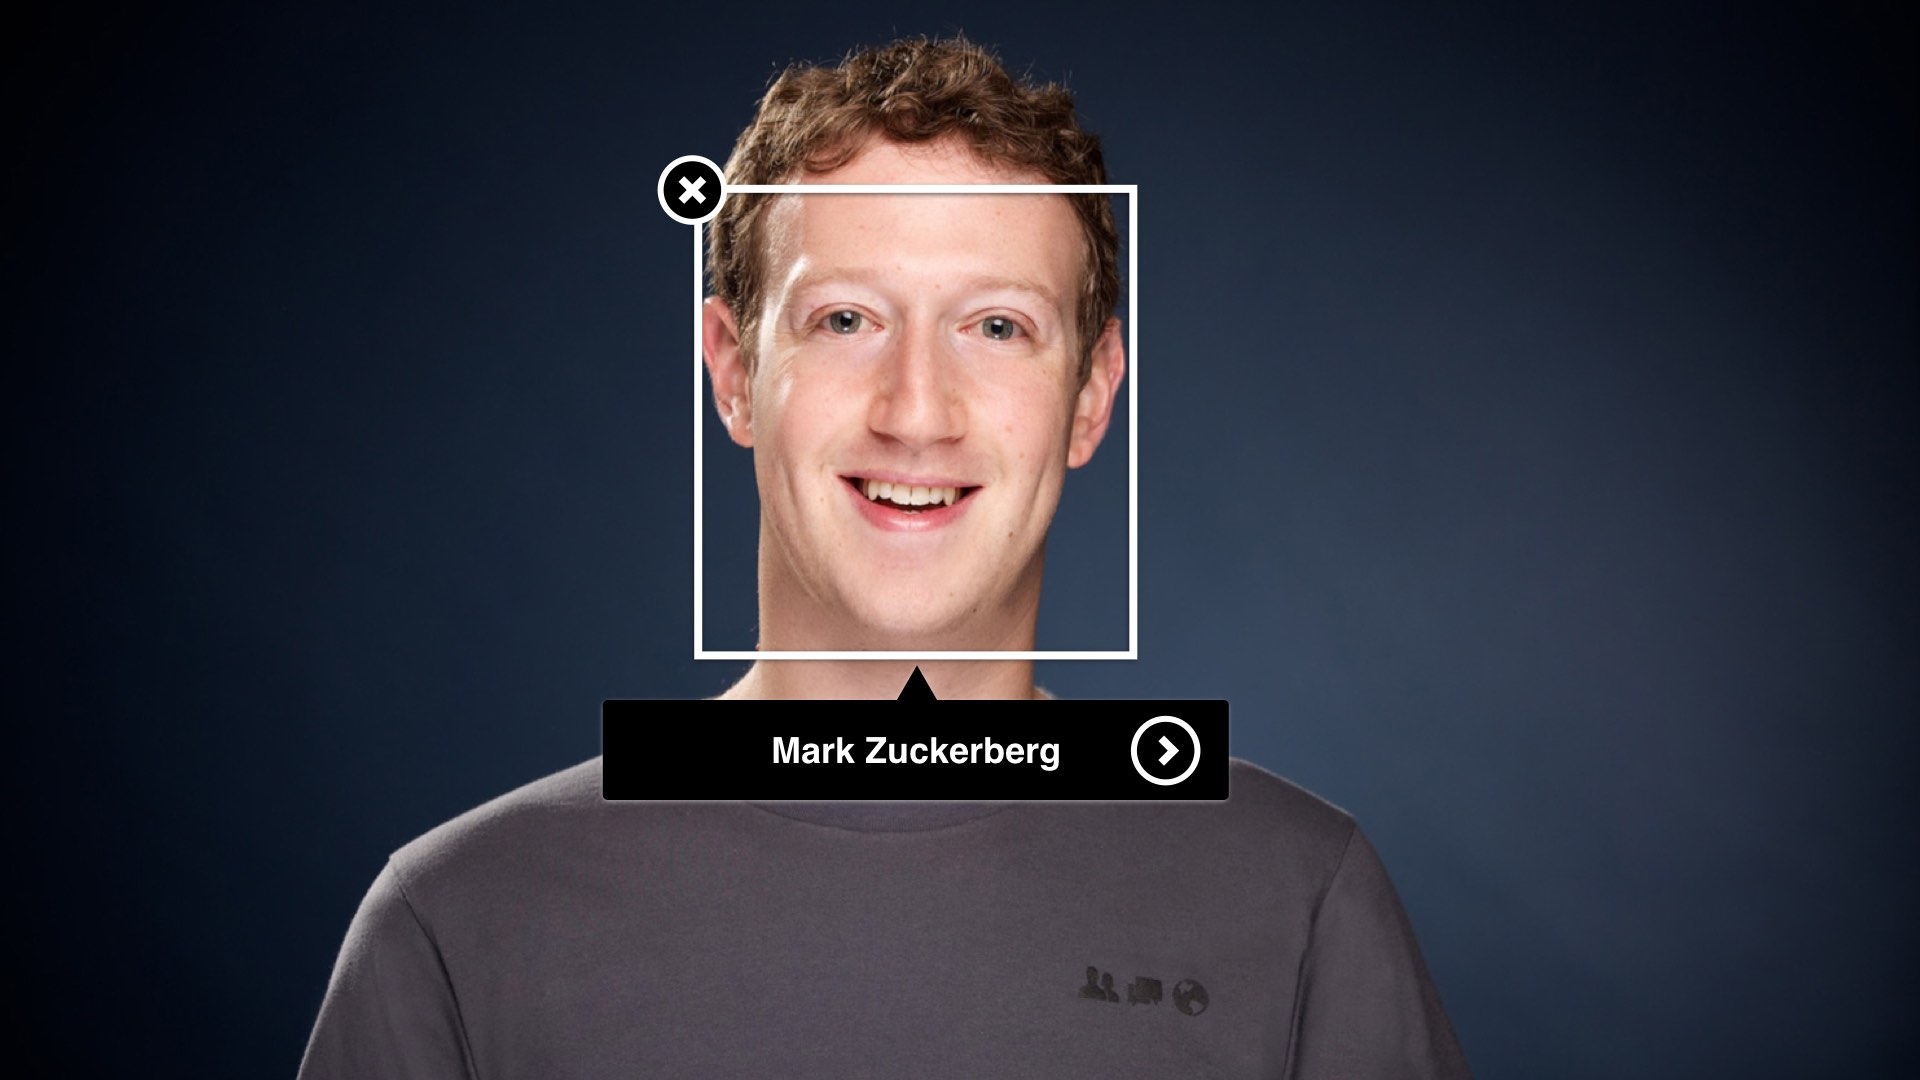

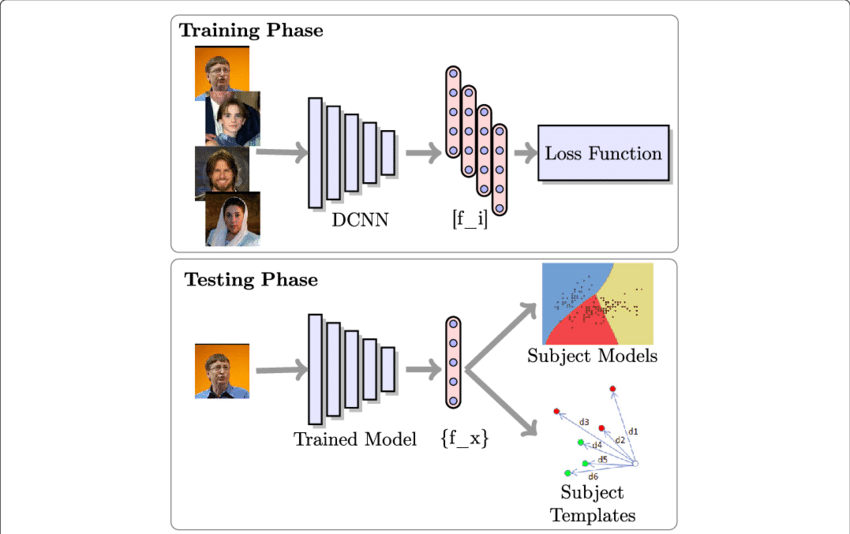

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50, MobileNetV3Small
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.models import Model, load_model
from keras.preprocessing import image
from scipy.spatial.distance import cosine, euclidean
import os
import numpy as np
import cv2

#
    1) Extract faces
    2) Perform face matching
    3) Display the identity of the person.


In [2]:
import matplotlib.pyplot as plt
from IPython.display import Image, clear_output, display

In [3]:
!pip install deepface

  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
Using cached click-8.3.1-py3-none-any.whl (108 kB)
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 1.9/1.9 MB 26.0 MB/s  0:00:00

   -- -------------------------------------  1/19 [PySocks]
   ------ ---------------------------------  3/19 [joblib]
   ------ ---------------------------------  3/19 [joblib]
   ------ ---------------------------------  3/19 [joblib]
   ------ ---------------------------------  3/19 [joblib]
   ------ ---------------------------------  3/19 [joblib]
   ------ ---------------------------------  3/19 [joblib]
   ------ ---------------------------------  3/19 [joblib]
   ------ ---------------------------------  3/19 [joblib]
   -------- -------------------------------  4/19 [itsdangerous]
   ---------- -----------------------------  5/19 [gunicorn]
   ---------- -----------------------------  5/19 [gunicorn]
   ---------- ----------

In [9]:
from deepface import DeepFace

member_path = r'C:\Users\jinny\Desktop\cv\member_faces'
# Image files of all members.
filenames = [
    'channing_tatum.jpg',
    'sharon_stone1.jpg',
    'sharon_stone3.jpg',
    'tom_cruise.jpg'
]
# List of face detection methods that  DeepFace subports
backends = [
    'opencv',      # default (เร็ว แต่บางครั้งพลาด)
    'ssd',         # Single Shot Detector
    'mtcnn',       # Multi-task Cascaded Convolutional Networks
    'retinaface',  # แม่นยำสูง (แนะนำ)
    'mediapipe',   # เร็วและแม่นยำดี (Google MediaPipe)
    'dlib'         # ใช้ HOG + CNN (บางเครื่องติดตั้งยาก)
]

models = [
    "VGG-Face",
    "Facenet",
    "Facenet512",
    "OpenFace",
    "DeepFace",
    "DeepID",
    "ArcFace",
    "Dlib",
    "SFace"
]

# Create embeddings by using VGG-Face model (VGGFace2)
print("Extracting embeddings...")
embeddings = []
for file in filenames:
    img_path = member_path  + "/" + file
    print(img_path)

    embedding_obj = DeepFace.represent(
        img_path=img_path,
        model_name=models[1],
        detector_backend = backends[0],
        enforce_detection=True
    )
    embeddings.append(embedding_obj[0]['embedding'])

# A function that compares two embeddings

def is_match(known_embedding, candidate_embedding, thresh=10 , method="euclidean"):

    # Cosine similarity
    score_cosine = cosine(known_embedding, candidate_embedding)
    # Eucidean distance
    score_euclidean = euclidean(known_embedding, candidate_embedding)

    if method == "cosing" :
        if score_cosine <= thresh:
            # print('Positive Cosine Tests')
            # print(f'>face is a Match ({score_cosine:.3f} <= {thresh})')
            return True, score_cosine

        else:
            # print('Negative Cosine Tests')
            # print(f' Unknow >face is NOT a Match ({score_cosine:.3f} > {thresh})')
            return False, score_cosine


    else:

        if score_euclidean  <= thresh:
            # print("Positive Euclidean Test")
            # print(f">face is a Match ({score_euclidean:.3f} <= {thresh})")
            return True, score_euclidean

        else:
            # print("Nagative Euclidean Tests")
            # print(f"Unknow >face is NOT a Match ({score_euclidean:.3f} > {thresh})")
            return False, score_euclidean

# Test
is_match(embeddings[0], embeddings[1], )
is_match(embeddings[1], embeddings[2], )

Extracting embeddings...
C:\Users\jinny\Desktop\cv\member_faces/channing_tatum.jpg
C:\Users\jinny\Desktop\cv\member_faces/sharon_stone1.jpg
C:\Users\jinny\Desktop\cv\member_faces/sharon_stone3.jpg
C:\Users\jinny\Desktop\cv\member_faces/tom_cruise.jpg


(True, 9.300229071338434)

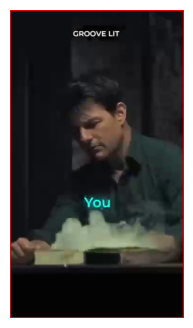

In [16]:
# Video capture
cap = cv2.VideoCapture(r"C:\Users\jinny\Desktop\cv\image\TomCruiseLipSync.mp4")

# Load Haar cascade for face detection
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()



frame_count = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    if frame_count % 1 == 0:

        #####==== Insert code here =====#####


        # Convert BGR2RGB
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Face detection using Deepface
        #### Insert code here ####
        face_location = DeepFace.extract_faces(
            img_path=frame,
            detector_backend=backends[0],
            enforce_detection=False,
        )
        for i, face in enumerate(face_location):

            # Face area : dict {'x':..,'y':..,'w':..,'h':..}
            region = face['facial_area']

            #### x y w h ####
            x = region['x']
            y = region['y']
            w = region['w']
            h = region['h']

            #### Crop the face ####
            face_img = frame[y:y+h, x:x+w]


            try:
                #### Face embedding using Deepface ####
                #### Insert code here ####
                embedding_obj = DeepFace.represent(
                    img_path = face_img,
                    model_name = models[1],
                    detector_backend = backends[0],
                    enforce_detection = False
                )

                #### Face maching ####
                #### Insert code here ####
                isMatch , scoreConf = is_match(
                    embeddings[3],
                    embedding_obj[0]['embedding'],

                )
                scoreConf = round(scoreConf, 2)


                #### Display result ####
                #### Insert code here ####
                if isMatch:
                    name = "Tom Cruise " + str(scoreConf)
                    cv2.putText(
                        frame, 
                        name, 
                        (x, y-10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, 
                        (0, 255, 0), 
                        2
                        )
                    cv2.rectangle(
                        frame,
                        (x, y),
                        (x + w, y + h),
                        (0, 255, 0),
                        2
                    )
                else:
                    name = "Unknown " + str(scoreConf)
                    cv2.putText(
                        frame, 
                        name, 
                        (x, y-10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        0.5, 
                        (255, 0, 0), 
                        2
                        )
                    cv2.rectangle(
                        frame,
                        (x, y),
                        (x + w, y + h),
                        (255, 0, 0),
                        2
                    )


            except Exception as e:
                print("Error:", e)

            # Clear previous output
            clear_output(wait=True)

            # Display video frame
            plt.figure(figsize=(6,4))
            plt.imshow(frame)
            plt.axis('off')
            plt.show()
# Release resources
cap.release()
